# Taii Hirano

## Which experience level worker is most hired in the mid-level company size?

Sub Questions:

- Which region tends to have a large company size?
- Which region tends to have a middle company size?
- Which region tends to have a small company size?


Recent popularity in the data science/computer science field suggests the need for data analysis jobs. However, when we graduate from post-secondary education, we face the difficulties of choosing jobs. One of the reasons this problem occurs is that students do not have enough resources to determine their future careers. This problem could be solved by analyzing how the size of the company relates to the salary level. More in detail, we can analyze the relevance between regions and company size and the tendency of hired workers’ experience levels in a specified scale of the company. 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="ticks",
              font_scale=1.3, # This scales the fonts slightly higher
             )
# And we're going to remove the top and right axis lines
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

In [82]:
#load file

df = pd.read_csv('../data/raw/ds_salaries.csv', header=1)
df = df.drop(columns='Unnamed: 0')

df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.405272,6.921330e-01,2020.0,2021.0,2022.0,2022.0,2022.0
salary,607.0,324000.062603,1.544357e+06,4000.0,70000.0,115000.0,165000.0,30400000.0
salary_in_usd,607.0,112297.869852,7.095726e+04,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.922570,4.070913e+01,0.0,50.0,100.0,100.0,100.0


In [84]:
df.describe(exclude='number').T

,count,unique,top,freq
experience_level,607,4,SE,280
employment_type,607,4,FT,588
job_title,607,50,Data Scientist,143
salary_currency,607,17,USD,398
employee_residence,607,57,US,332
company_location,607,50,US,355
company_size,607,3,M,326


In [85]:
df = df.drop(columns=["work_year", "employment_type", "job_title", "salary", "salary_currency", "remote_ratio"])
df

,experience_level,salary_in_usd,employee_residence,company_location,company_size
0,MI,79833,DE,DE,L
1,SE,260000,JP,JP,S
2,SE,109024,GB,GB,M
3,MI,20000,HN,HN,S
4,SE,150000,US,US,L
...,...,...,...,...,...
602,SE,154000,US,US,M
603,SE,126000,US,US,M
604,SE,129000,US,US,M
605,SE,150000,US,US,M


In [86]:
dfL = df[df["company_size"] == "L"]
dfM = df[df["company_size"] == "M"]
dfS = df[df["company_size"] == "S"]

dfL
dfM
dfS

,experience_level,salary_in_usd,employee_residence,company_location,company_size
1,SE,260000,JP,JP,S
3,MI,20000,HN,HN,S
6,SE,190000,US,US,S
9,SE,125000,NZ,NZ,S
10,EN,51321,FR,FR,S
...,...,...,...,...,...
510,EN,150000,AU,AU,S
512,EN,65000,US,US,S
513,SE,71444,IE,IE,S
515,MI,48000,RU,US,S


In [87]:
dfL = dfL.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"})
dfM = dfM.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"})
dfS = dfS.loc[:, ["experience_level", "company_size"]].groupby("experience_level").count().reset_index().rename(columns={"company_size":"count"})

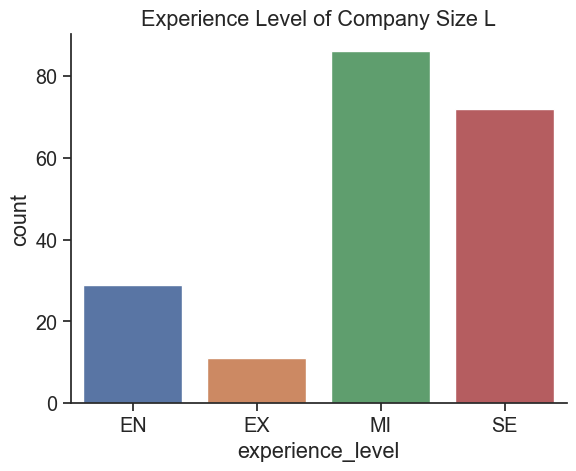

In [96]:
axL = sns.barplot(data=dfL, x="experience_level", y="count")
axL.set(title="Experience Level of Company Size L")
None

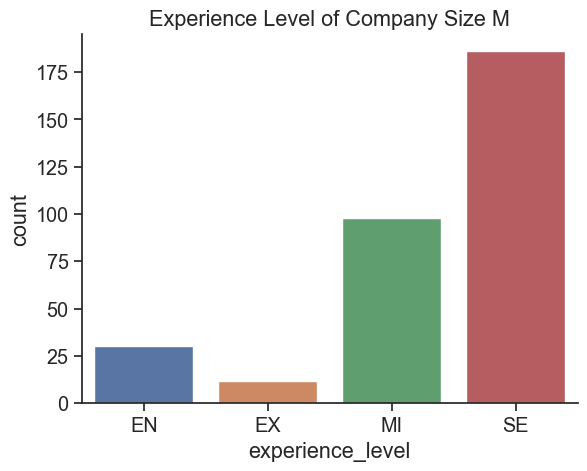

In [97]:
axM = sns.barplot(data=dfM, x="experience_level", y="count")
axM.set(title="Experience Level of Company Size M")
None

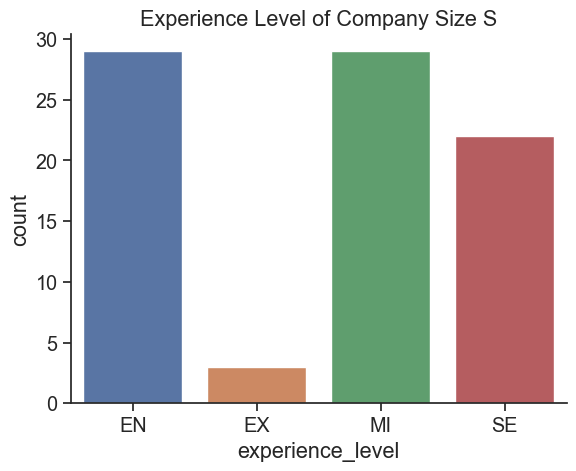

In [98]:
axS = sns.barplot(data=dfS, x="experience_level", y="count")
axS.set(title="Experience Level of Company Size S")
None